In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Reading whale returns
csv_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [5]:
# Reading algorithmic returns
csv_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [8]:
# Reading S&P 500 Closing Prices
csv_path = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(',','')
sp500_history_df['Close'] = sp500_history_df["Close"].astype("float")

/Users/matthewwillson/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P']
sp500_daily_returns.head()

,S&P
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
all_daily_returns.dropna(inplace=True)
all_daily_returns.sort_index(inplace=True)
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis
## Performance Anlysis
#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

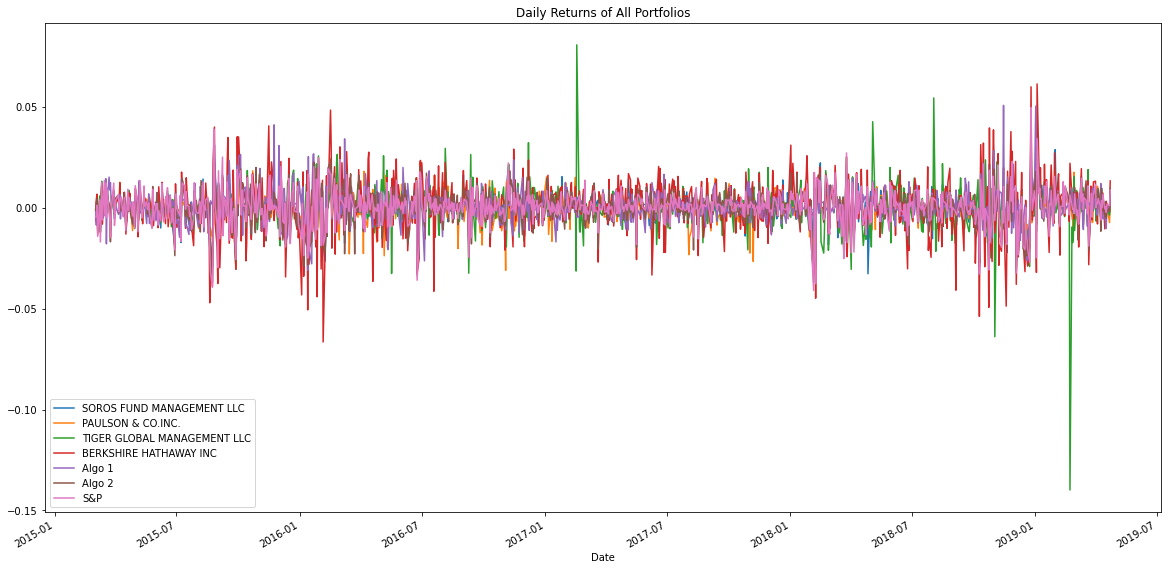

In [15]:
# Plot daily returns of all portfolios
all_daily_returns.plot(figsize=(20,10), title="Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns All Portfolios'}, xlabel='Date'>

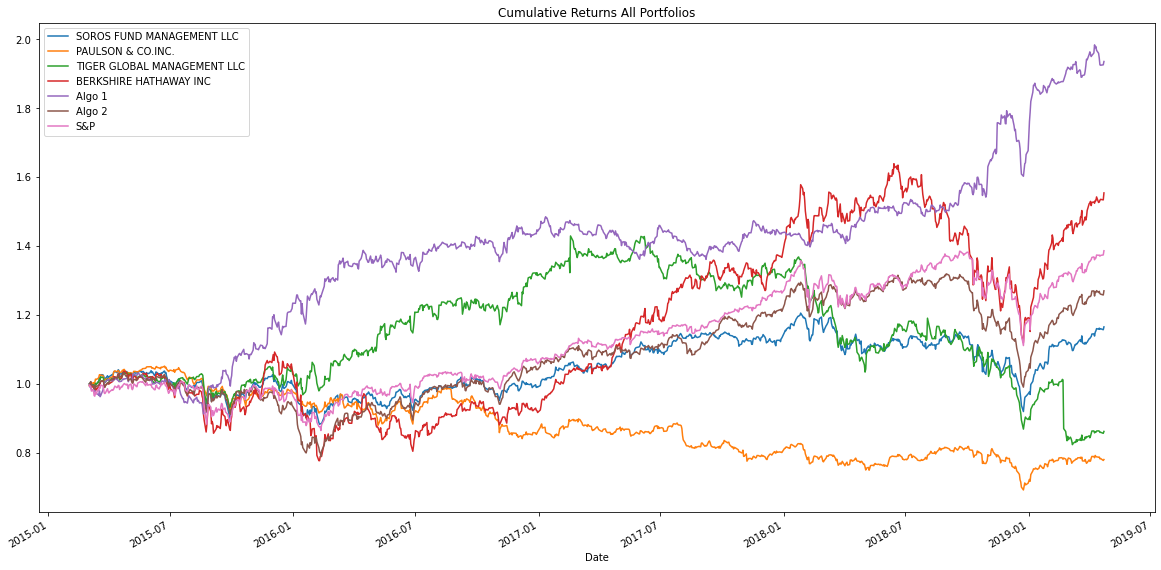

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns All Portfolios")

---

## Risk Analysis

<AxesSubplot:title={'center':'All Daily Returns Box Plot'}>

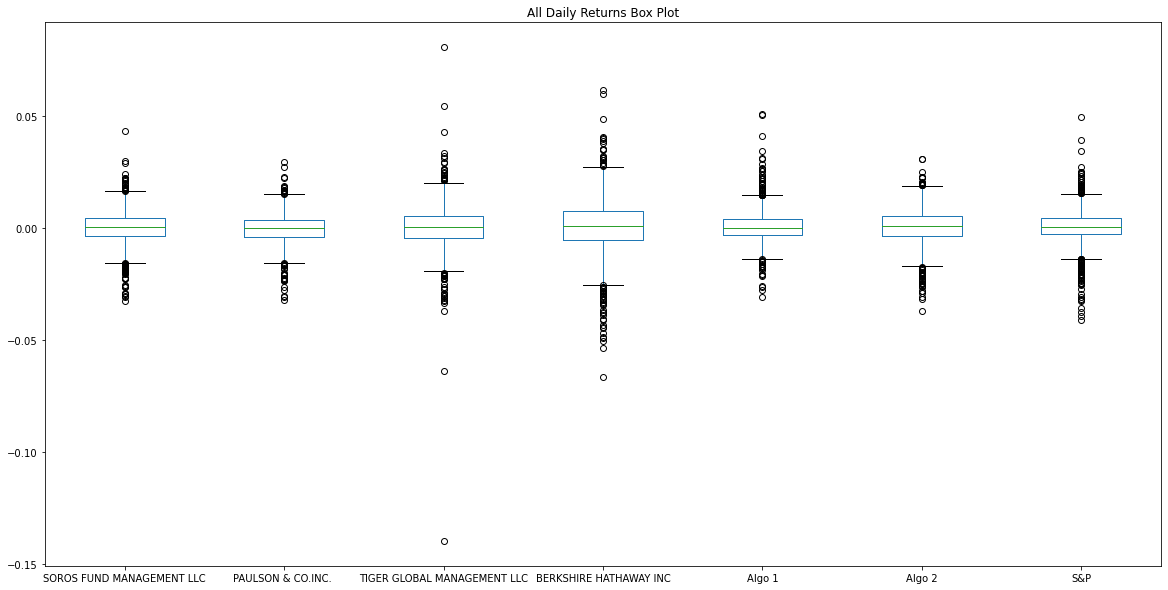

In [21]:
# Box plot to visually show risk
all_daily_returns.plot.box(figsize=(20,10), title="All Daily Returns Box Plot")

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
standard_dev = all_daily_returns.std()
standard_dev.sort_values(inplace=True)
standard_dev

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P                            0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()

S&P    0.008111
dtype: float64

In [27]:
# Determine which portfolios are riskier than the S&P 500
print("The portfolios riskier than the S&P 500 are Tiger Global Management LLC and Berkshire Hathaway Inc")

The portfolios riskier than the S&P 500 are Tiger Global Management LLC and Berkshire Hathaway Inc


### Calculate the Annualized Standard Deviation

In [167]:
# Calculate the annualized standard deviation (252 trading days)
vol = all_daily_returns.std() * np.sqrt(252)
vol.sort_values(inplace=True)
vol

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P                            0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

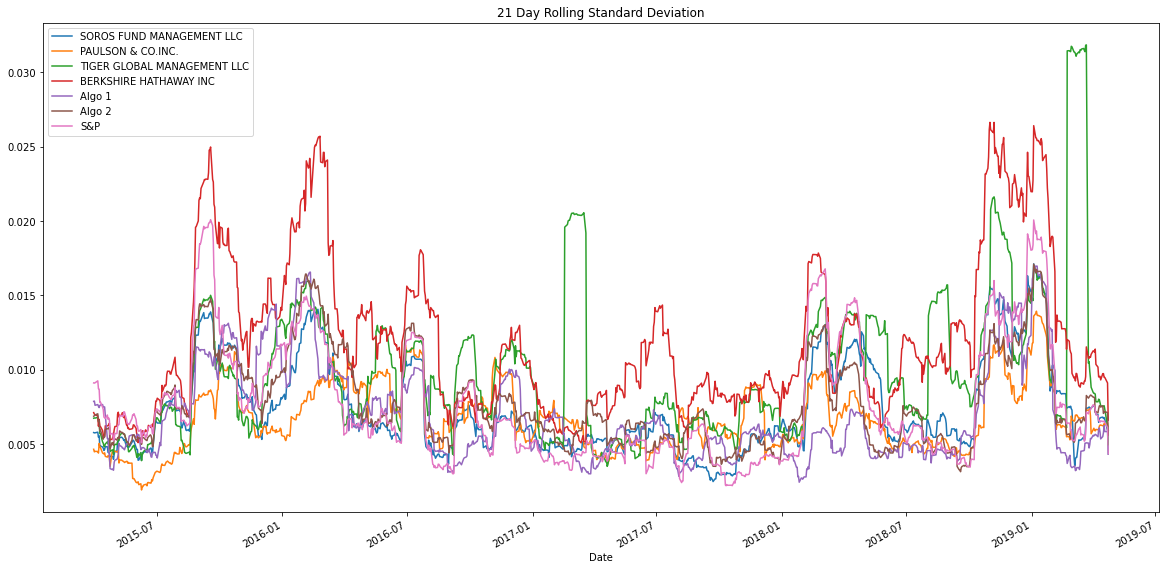

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cr_plot = all_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
cr_plot.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation = all_daily_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [30]:
# Calculate covariance of a single portfolio
BH_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].cov(cumulative_returns['S&P'])
# Calculate variance of S&P 500
sp500_variance = all_daily_returns['S&P'].var()
# Computing beta
beta = BH_covariance / sp500_variance
# Plot beta trend
beta

1.059625339455482

## Rolling Statistics Challenge: Exponentially Weighted Average 

In [32]:
# Use `ewm` to calculate the rolling window
rolling_BH_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(all_daily_returns['S&P'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = all_daily_returns['S&P'].rolling(window=21).var()
rolling_BH_beta = rolling_BH_covariance / rolling_variance
rolling_BH_beta.tail()

Date
2019-04-16    1.248331
2019-04-17    1.242711
2019-04-18    1.258626
2019-04-22    1.262289
2019-04-23    1.066739
dtype: float64

---

# Sharpe Ratios

In [172]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_daily_returns.mean()-all_daily_returns['S&P'].mean())*252)/(all_daily_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

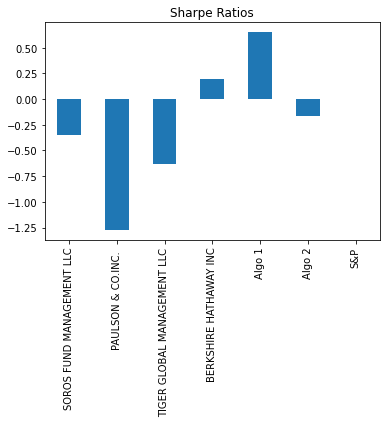

In [173]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [36]:
print("Algo 1 has the best Sharpe ratio")

Algo 1 has the best Sharpe ratio


---

# Create Custom Portfolio

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [37]:
# Reading data from 1st stock
csv_path = Path("./Resources/goog_historical.csv")
goog_history_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_history_df.sort_index(inplace=True)
goog_history_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [38]:
# Reading data from 2nd stock
csv_path = Path("./Resources/cost_historical.csv")
cost_history_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_history_df.sort_index(inplace=True)
cost_history_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [39]:
# Reading data from 3rd stock
csv_path = Path("./Resources/aapl_historical.csv")
aapl_history_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_history_df.sort_index(inplace=True)
aapl_history_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [40]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([goog_history_df, cost_history_df, aapl_history_df], axis='rows', join='inner')
custom_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [41]:
# Reset Date index
custom_portfolio.reset_index()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,AAPL,211.75
746,2019-05-06,AAPL,208.48
747,2019-05-07,AAPL,202.86
748,2019-05-08,AAPL,202.90


In [42]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio = custom_portfolio.pivot_table(values='NOCP', index="Trade DATE", columns="Symbol")
custom_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [43]:
# Calculate daily returns
cp_daily_returns = custom_portfolio.pct_change()
# Drop NAs
cp_daily_returns.dropna(inplace=True)
# Display sample data
cp_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = cp_daily_returns.dot(weights)
# Display sample data

weighted_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([weighted_portfolio_returns, all_daily_returns], axis='columns', join='inner')
combined_df = combined_df.rename(columns={
    0:"CP"})
combined_df.columns

Index(['CP', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P'],
      dtype='object')

In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df.head()

,CP,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
combined_df.std() * np.sqrt(252)

CP                             0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P                            0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation Including Custom Portfolio'}>

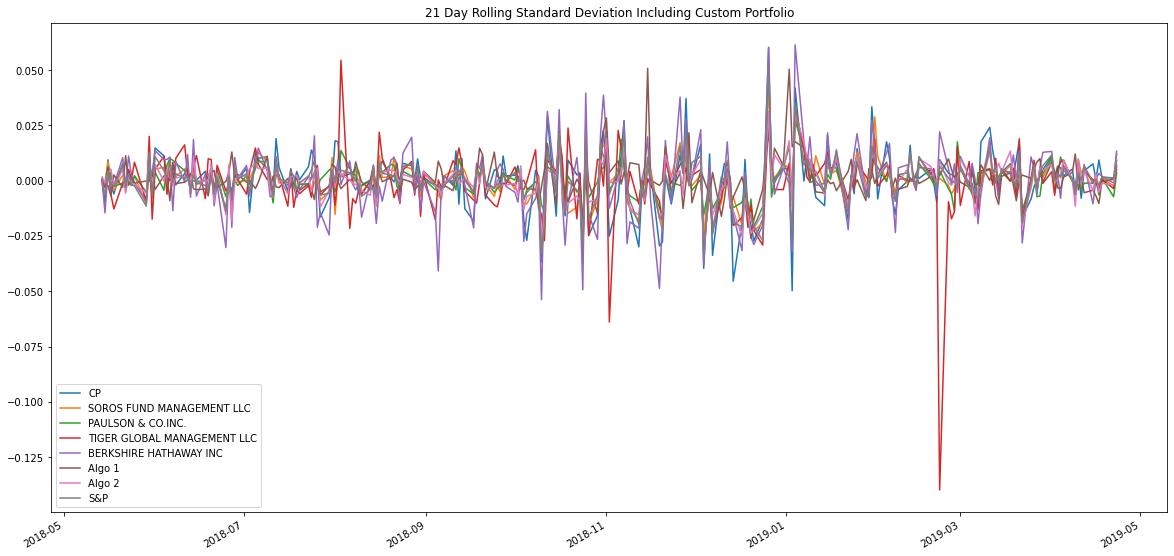

In [48]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_df.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation Including Custom Portfolio")

### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
combined_correlation = combined_df.corr()
combined_correlation.head()

,CP,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
CP,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [50]:
# Calculate and plot Beta
combined_60d_covariance = combined_df['CP'].rolling(window=60).cov(combined_df['S&P'])
# Calculate variance of S&P 500
sp500_60d_rolling_variance = combined_df['S&P'].rolling(window=60).var()
# Computing beta
rolling_cp_beta = combined_60d_covariance / sp500_60d_rolling_variance
rolling_cp_beta.tail()

2019-04-16    1.173574
2019-04-17    1.138133
2019-04-18    1.138551
2019-04-22    1.137941
2019-04-23    1.129204
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = ((combined_df.mean()-combined_df['S&P'].mean())*252)/(combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios Including Custom Portfolio'}>

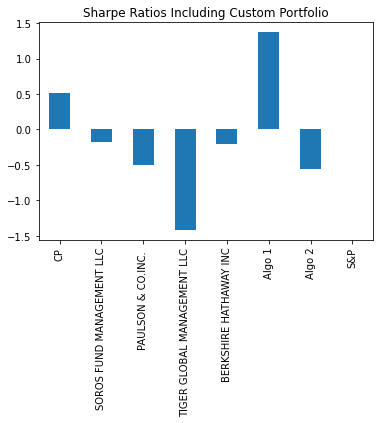

In [52]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios Including Custom Portfolio")

### How does your portfolio do?

Write your answer here!

<AxesSubplot:title={'center':'Performance'}>

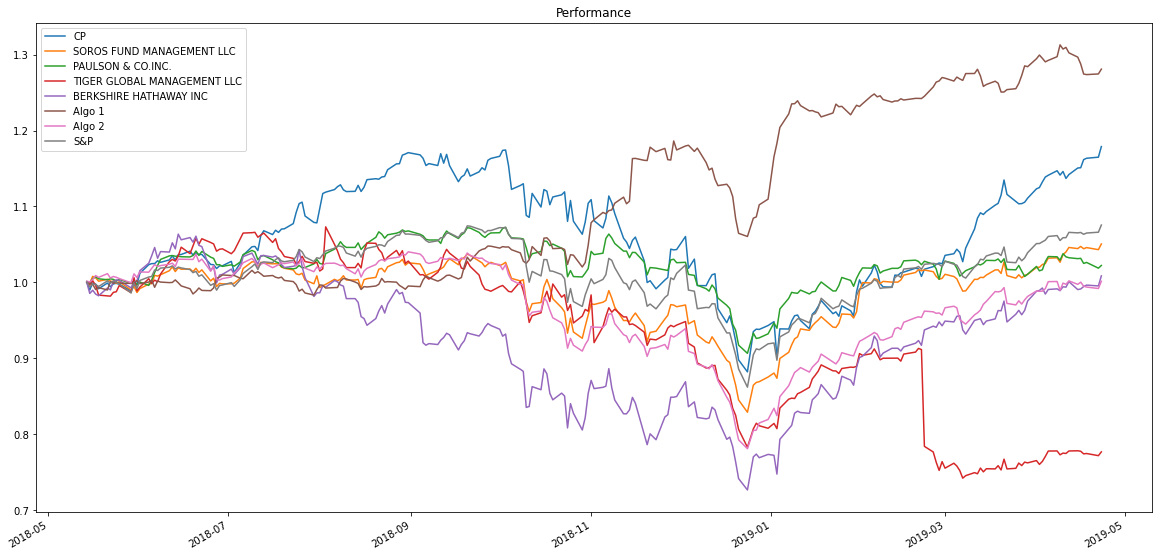

In [53]:
performance = (1 + combined_df).cumprod()
performance.plot(figsize=(20,10), title="Performance")

In [55]:
print("The Custom Portfolio outperfromed every portfolio except for Algorithm 1.")

The Custom Portfolio outperfromed every portfolio except for Algorithm 1.
